In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import pandas as pd
sys.path.append('..')
from wyscout.match import get_team_matches

In [2]:
SOUTHEND = 1687
NOTTS_C = 1677
WREXHAM = 10530
BARNET = 1701
WEALDSTONE = 1833

SEASON_2022 = 188172

J_BRIDGE = 289901
S_HOBSON = 489434
C_POWELL = 444130
M_DAKERS = 601997
K_LOPATA = 592169
H_CARDWELL = 330285

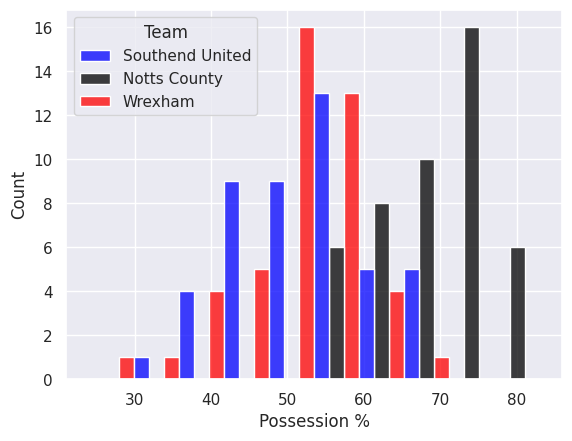

In [5]:
import seaborn as sns
from wyscout.match import get_match_advanced_stats

poss_per_team = {
    "team_id": [],
    "team": [],
    "poss": [],
    "goals": []
}

teams = {
    SOUTHEND: "Southend United",
    NOTTS_C: "Notts County",
    WREXHAM: "Wrexham"
}

def get_possession(match_id, team_id):
    stats = get_match_advanced_stats(match_id)
    goals = stats["general"][str(team_id)]["goals"]
    possession = stats["possession"][str(team_id)]["possessionPercent"]
    return goals, possession

for team in [SOUTHEND, NOTTS_C, WREXHAM]:
    matches = get_team_matches(team, SEASON_2022)
    for m in matches["matches"]:
        try:
            goals, poss = get_possession(m["matchId"], team)
            poss_per_team["team_id"].append(team)
            poss_per_team["team"].append(teams[team])
            poss_per_team["poss"].append(poss)
            poss_per_team["goals"].append(goals)
        except:
            pass


df = pd.DataFrame(poss_per_team)

sns.set_theme()
ax = sns.histplot(data=df, x="poss", hue="team", multiple="dodge", bins=10, palette=["blue", "black", "red"])

ax.set(xlabel='Possession %', ylabel='Count')
leg = ax.get_legend()
new_title = 'Team'
leg.set_title(new_title)